# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

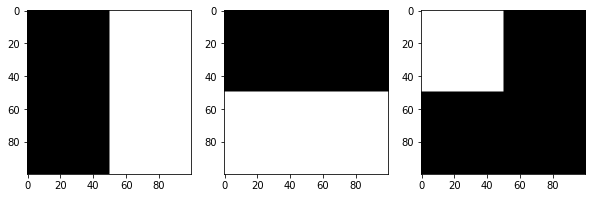

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


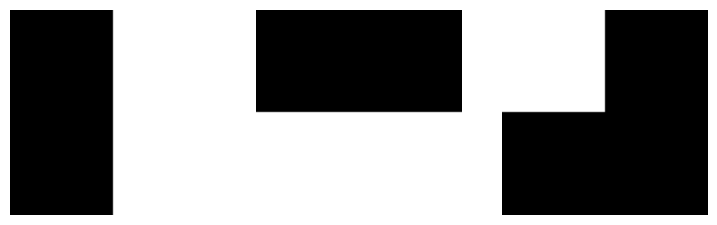

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img1 = np.zeros((100, 100), dtype=np.uint8)
img1[:, 50:] = 255  

img2 = np.zeros((100, 100), dtype=np.uint8)
img2[50:, :] = 255  

img3 = np.zeros((100, 100), dtype=np.uint8)
img3[:50, :50] = 255  

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].imshow(img1, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray')
axes[1].axis('off')

axes[2].imshow(img3, cmap='gray')
axes[2].axis('off')

plt.show()

*   Use the above three images to create the following image

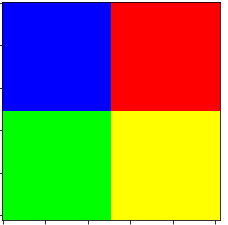
*Hint: Remember channels and color spaces*

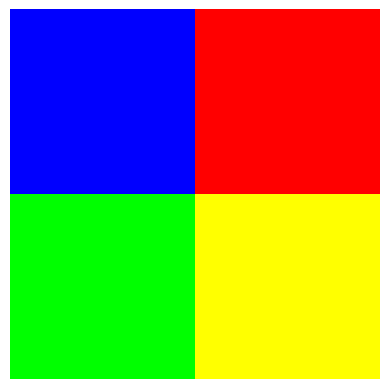

In [9]:
# solution
import numpy as np
import matplotlib.pyplot as plt

img1 = np.zeros((100, 100), dtype=np.uint8)
img1[:, 50:] = 255  

img2 = np.zeros((100, 100), dtype=np.uint8)
img2[50:, :] = 255  

img3 = np.zeros((100, 100), dtype=np.uint8)
img3[:50, :50] = 255  

color_image = np.zeros((100, 100, 3), dtype=np.uint8)
color_image[:, :, 0] = img1  
color_image[:, :, 1] = img2  
color_image[:, :, 2] = img3  

plt.imshow(color_image)
plt.axis('off')
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

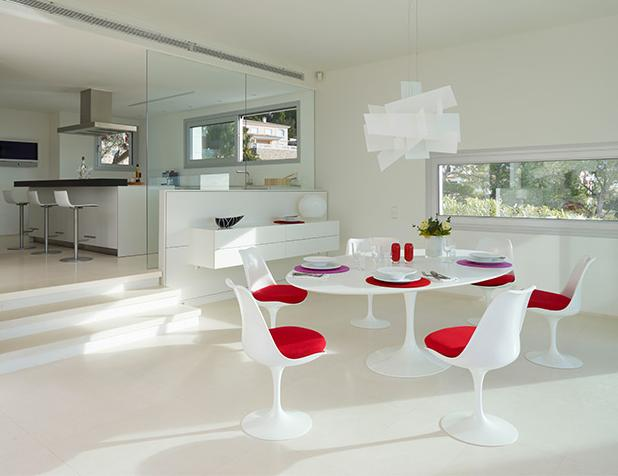

*   Extract individual channels and plot them using matplotlib subplot.



In [11]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 660.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/39.5 MB 919.0 kB/s eta 0:00:43
   ---------------------------------------- 0.2/39.5 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.4/39.5 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.7/39.5 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.4/39.5 MB 5.3 MB/s eta 0:00:08
   -- ------------------------------------- 2.6/39.5 MB 8.9 MB/s eta 0:00:05
   ---- ----------------------------------- 4.7/39.5 MB 13.7 MB/s eta 0:00:03
   -------- ------------------------------- 8.3/39.5 MB 21.2 MB/s eta 0:00:02
   ------------- -------------------------- 13.7/39.5 MB 93.9 MB/s eta 0:00:01
   ------------------ --------------------- 17.8/39.5 MB 108.8 MB/s eta 0:00:01
   ------------------ --------------------- 17.8/39.5 MB 108.8 MB/s eta 

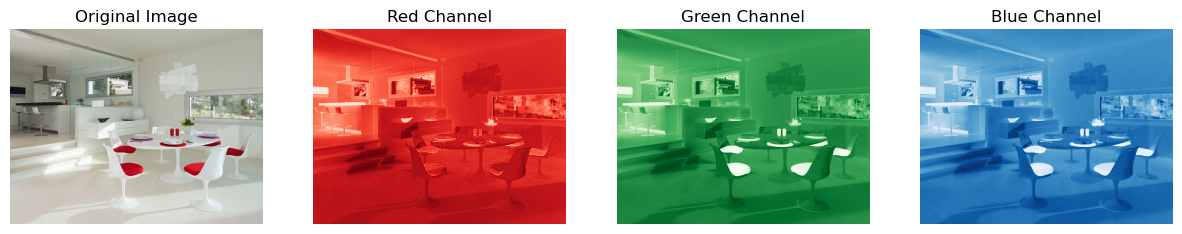

In [12]:
# solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("sillas.jpg")  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

R, G, B = cv2.split(image)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(R, cmap="Reds")
axes[1].set_title("Red Channel")
axes[1].axis("off")

axes[2].imshow(G, cmap="Greens")
axes[2].set_title("Green Channel")
axes[2].axis("off")

axes[3].imshow(B, cmap="Blues")
axes[3].set_title("Blue Channel")
axes[3].axis("off")

plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

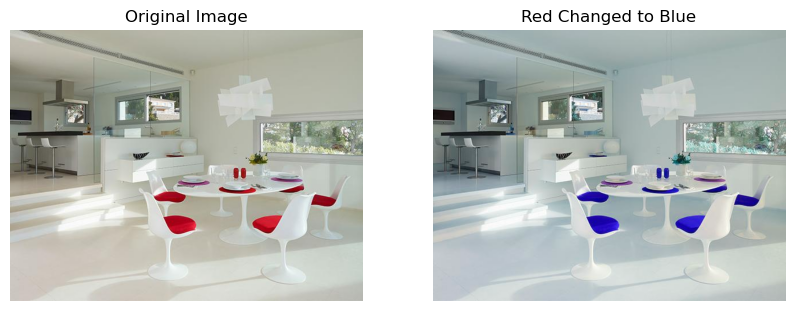

In [13]:
# solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("sillas.jpg")  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

image_swapped = image.copy()
image_swapped[:, :, [0, 2]] = image_swapped[:, :, [2, 0]]  

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(image_swapped)
axes[1].set_title("Red Changed to Blue")
axes[1].axis("off")

plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

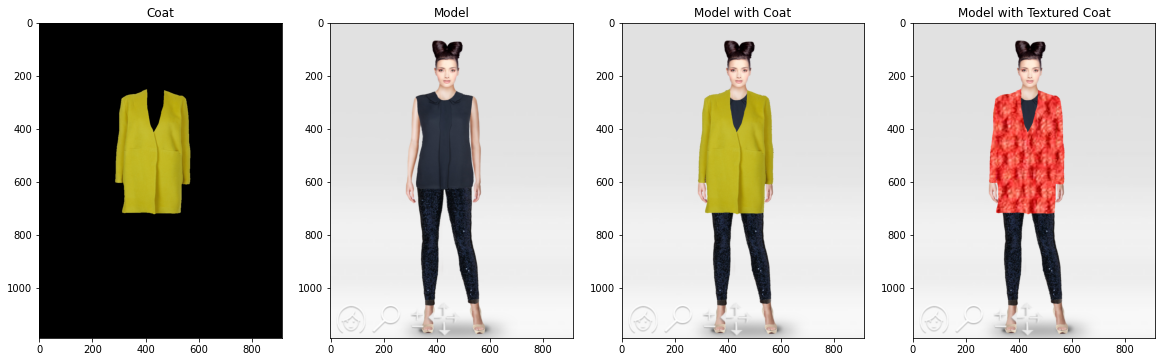

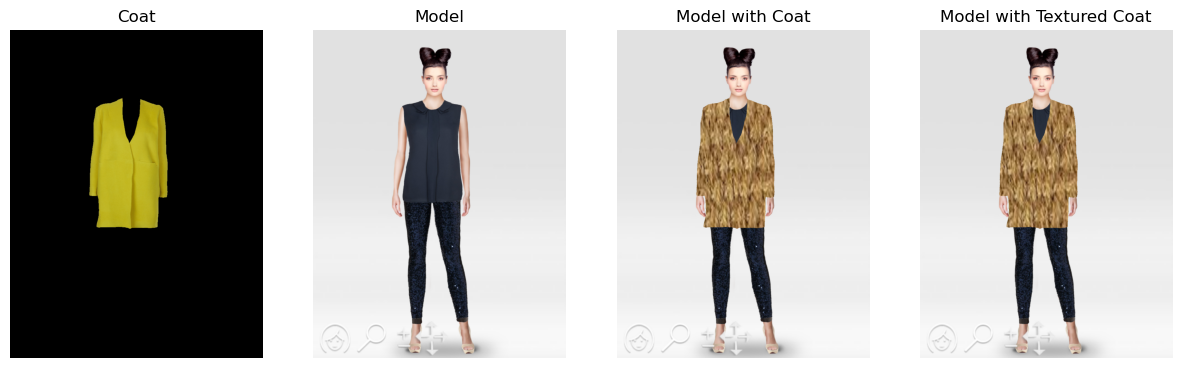

In [14]:
# solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = cv2.imread("model.png")
coat = cv2.imread("coat.png")
texture = cv2.imread("texture.png")  

model = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)
coat = cv2.cvtColor(coat, cv2.COLOR_BGR2RGB)
texture = cv2.cvtColor(texture, cv2.COLOR_BGR2RGB)

gray_coat = cv2.cvtColor(coat, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(gray_coat, 1, 255, cv2.THRESH_BINARY)

mask_inv = cv2.bitwise_not(mask)

texture_resized = cv2.resize(texture, (coat.shape[1], coat.shape[0]))

textured_coat = cv2.bitwise_and(texture_resized, texture_resized, mask=mask)

model_bg = cv2.bitwise_and(model, model, mask=mask_inv)

model_with_textured_coat = cv2.add(model_bg, textured_coat)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(coat)
axes[0].set_title("Coat")
axes[0].axis("off")

axes[1].imshow(model)
axes[1].set_title("Model")
axes[1].axis("off")

axes[2].imshow(model_with_textured_coat)
axes[2].set_title("Model with Coat")
axes[2].axis("off")

axes[3].imshow(model_with_textured_coat)
axes[3].set_title("Model with Textured Coat")
axes[3].axis("off")

plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




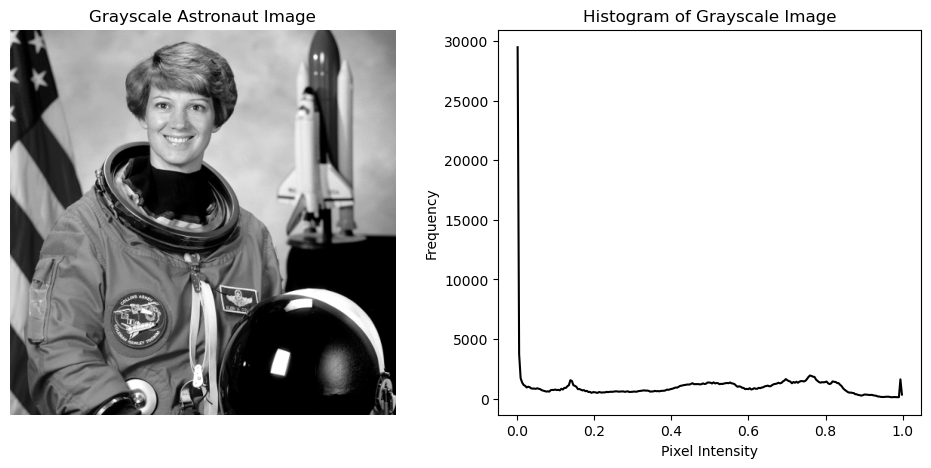

In [15]:
# solution
import matplotlib.pyplot as plt
from skimage import data, color, exposure

astronaut_img = data.astronaut()

gray_astronaut = color.rgb2gray(astronaut_img)

hist, bin_centers = exposure.histogram(gray_astronaut)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(gray_astronaut, cmap='gray')
axes[0].set_title("Grayscale Astronaut Image")
axes[0].axis("off")

axes[1].plot(bin_centers, hist, color='black')
axes[1].set_title("Histogram of Grayscale Image")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

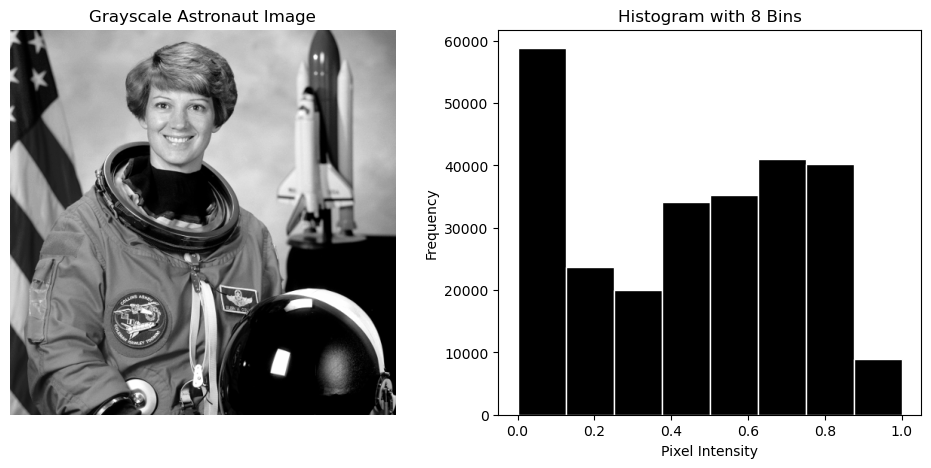

In [16]:
# solution
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, color

astronaut_img = data.astronaut()

gray_astronaut = color.rgb2gray(astronaut_img)

hist, bin_edges = np.histogram(gray_astronaut, bins=8, range=(0, 1))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(gray_astronaut, cmap='gray')
axes[0].set_title("Grayscale Astronaut Image")
axes[0].axis("off")

axes[1].bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color='black', edgecolor='white', align="edge")
axes[1].set_title("Histogram with 8 Bins")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...
Yes, The bin count in a histogram determines how the pixel intensity values are grouped. It affects the granularity of the histogram and how much detail we can observe in the image's intensity distribution.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


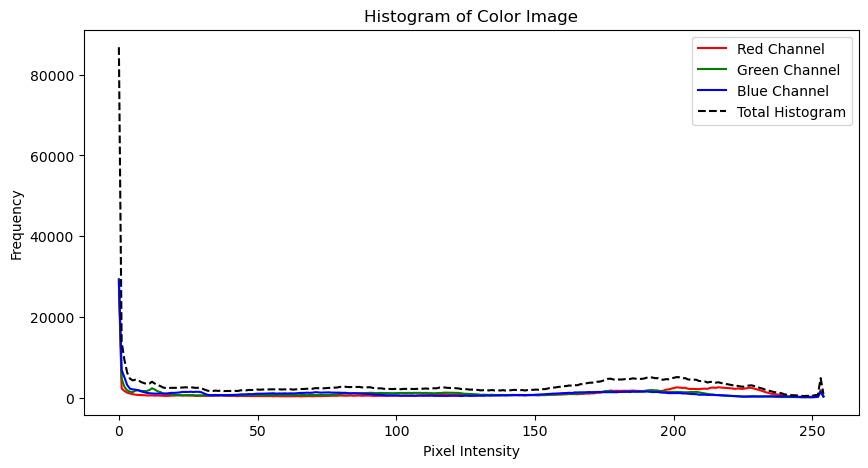

In [19]:
#solution
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure

color_image = data.astronaut()  # This is an RGB image

hist_red, bin_edges = np.histogram(color_image[:, :, 0], bins=256, range=(0, 255))
hist_green, _ = np.histogram(color_image[:, :, 1], bins=256, range=(0, 255))
hist_blue, _ = np.histogram(color_image[:, :, 2], bins=256, range=(0, 255))

total_histogram = hist_red + hist_green + hist_blue

plt.figure(figsize=(10, 5))

plt.plot(bin_edges[:-1], hist_red, color='red', label='Red Channel')
plt.plot(bin_edges[:-1], hist_green, color='green', label='Green Channel')
plt.plot(bin_edges[:-1], hist_blue, color='blue', label='Blue Channel')
plt.plot(bin_edges[:-1], total_histogram, color='black', linestyle='dashed', label='Total Histogram')

plt.title("Histogram of Color Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



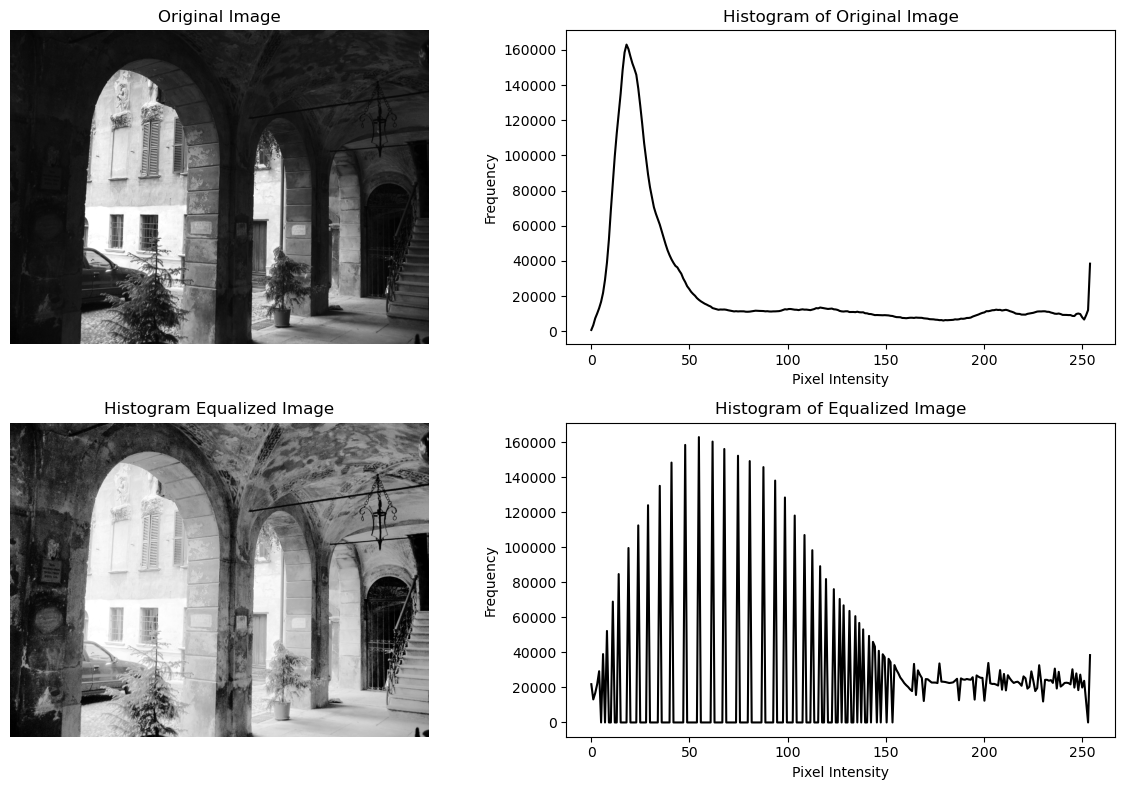

In [21]:
# solution
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import exposure, color

image = cv2.imread("aquatermi_lowcontrast.jpg", cv2.IMREAD_GRAYSCALE)  

hist_orig, bin_edges_orig = np.histogram(image, bins=256, range=(0, 255))

equalized_image = exposure.equalize_hist(image)  

equalized_image_8bit = (equalized_image * 255).astype(np.uint8)

hist_eq, bin_edges_eq = np.histogram(equalized_image_8bit, bins=256, range=(0, 255))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].plot(bin_edges_orig[:-1], hist_orig, color="black")
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

axes[1, 0].imshow(equalized_image_8bit, cmap="gray")
axes[1, 0].set_title("Histogram Equalized Image")
axes[1, 0].axis("off")

axes[1, 1].plot(bin_edges_eq[:-1], hist_eq, color="black")
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...
Both Histogram Equalization (HE) and Linear Contrast Stretching (LCS) improve image contrast, but they work differently.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



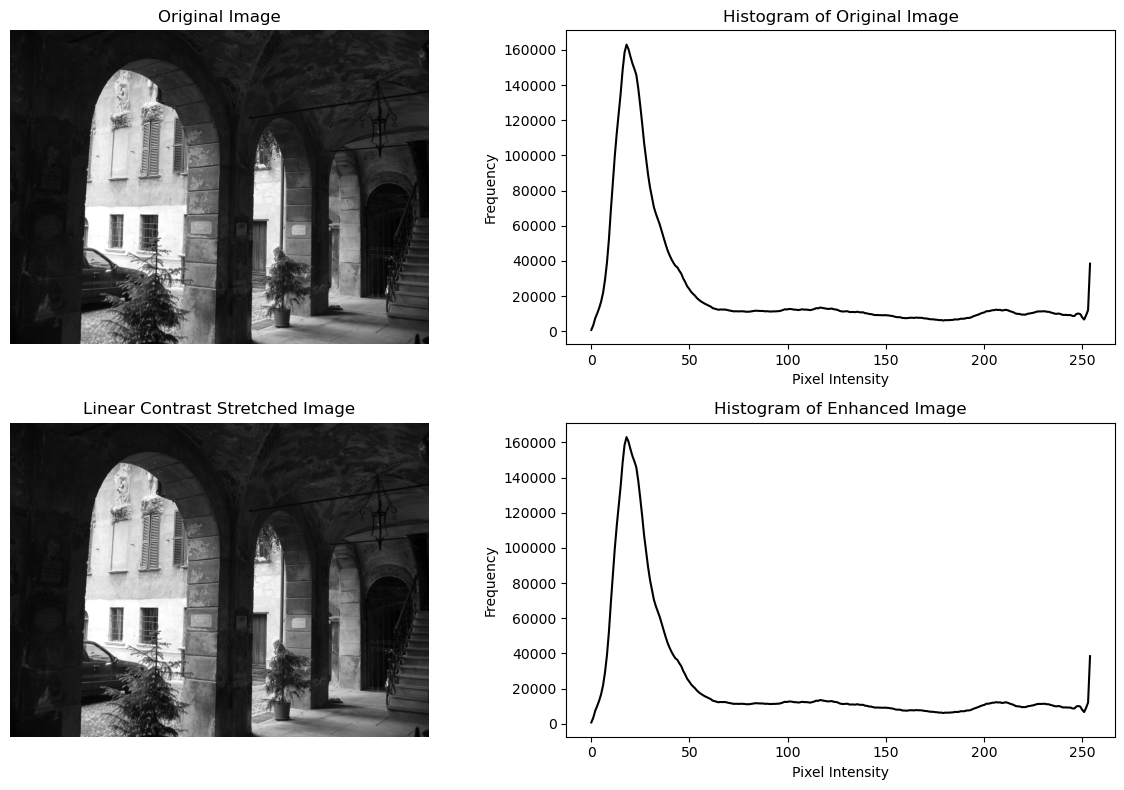

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def linear_contrast_stretch(image):
    """Applies linear contrast stretching to a grayscale image."""
    
    I_min, I_max = np.min(image), np.max(image)
    
    stretched_image = (image - I_min) * (255.0 / (I_max - I_min))
    
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)
    
    return stretched_image

image = cv2.imread("aquatermi_lowcontrast.jpg", cv2.IMREAD_GRAYSCALE)

bins = 256

enhanced_image = linear_contrast_stretch(image)

hist_orig, bin_edges_orig = np.histogram(image, bins=bins, range=(0, 255))
hist_enhanced, bin_edges_enhanced = np.histogram(enhanced_image, bins=bins, range=(0, 255))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].plot(bin_edges_orig[:-1], hist_orig, color="black")
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title("Linear Contrast Stretched Image")
axes[1, 0].axis("off")

axes[1, 1].plot(bin_edges_enhanced[:-1], hist_enhanced, color="black")
axes[1, 1].set_title("Histogram of Enhanced Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




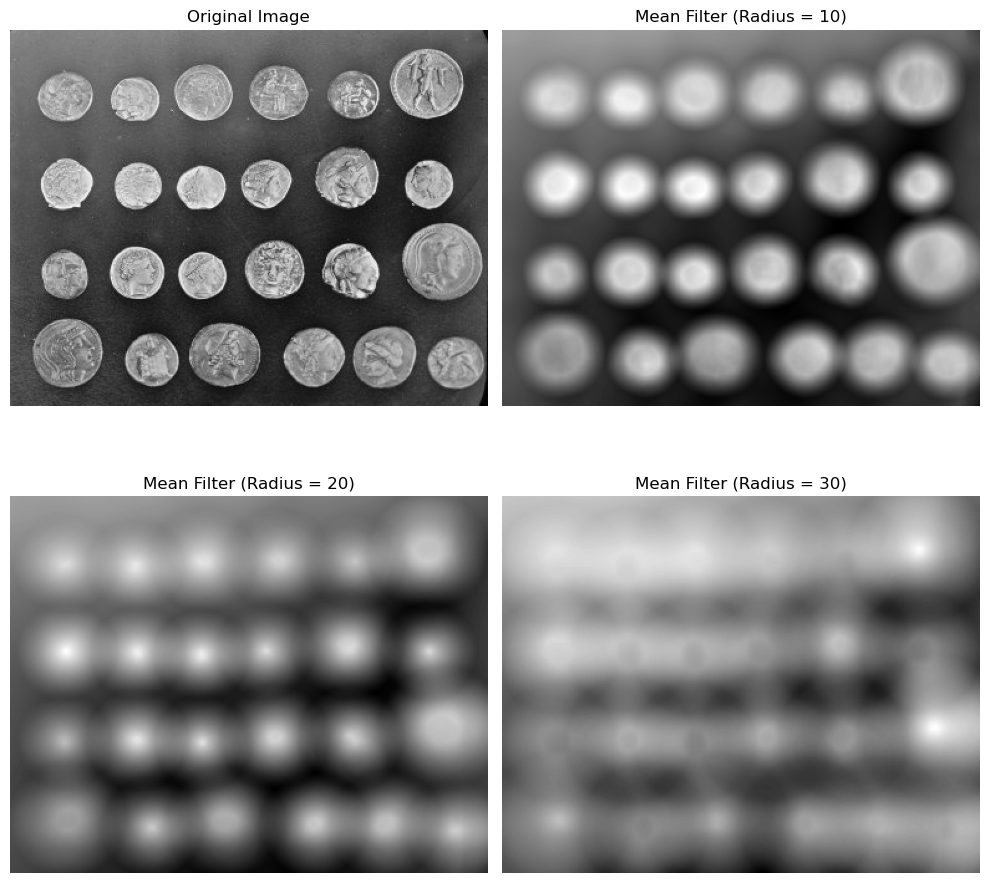

In [28]:
# solution
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_ubyte
from skimage.filters import rank
from skimage.morphology import disk

# Step 1: Load the coins image
coins = data.coins()

# Convert image to 8-bit unsigned integer (required for rank filters)
coins_8bit = img_as_ubyte(coins)

# Step 2: Define structuring elements
selem_20 = disk(20)  # Radius 20
selem_30 = disk(30)  # Increased radius by 10
selem_10 = disk(10)  # Decreased radius by 10

# Step 3: Apply mean filters (Fixed argument)
mean_20 = rank.mean(coins_8bit, selem_20)
mean_30 = rank.mean(coins_8bit, selem_30)
mean_10 = rank.mean(coins_8bit, selem_10)

# Step 4: Visualize results using 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(mean_10, cmap='gray')
axes[0, 1].set_title("Mean Filter (Radius = 10)")
axes[0, 1].axis("off")

axes[1, 0].imshow(mean_20, cmap='gray')
axes[1, 0].set_title("Mean Filter (Radius = 20)")
axes[1, 0].axis("off")

axes[1, 1].imshow(mean_30, cmap='gray')
axes[1, 1].set_title("Mean Filter (Radius = 30)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

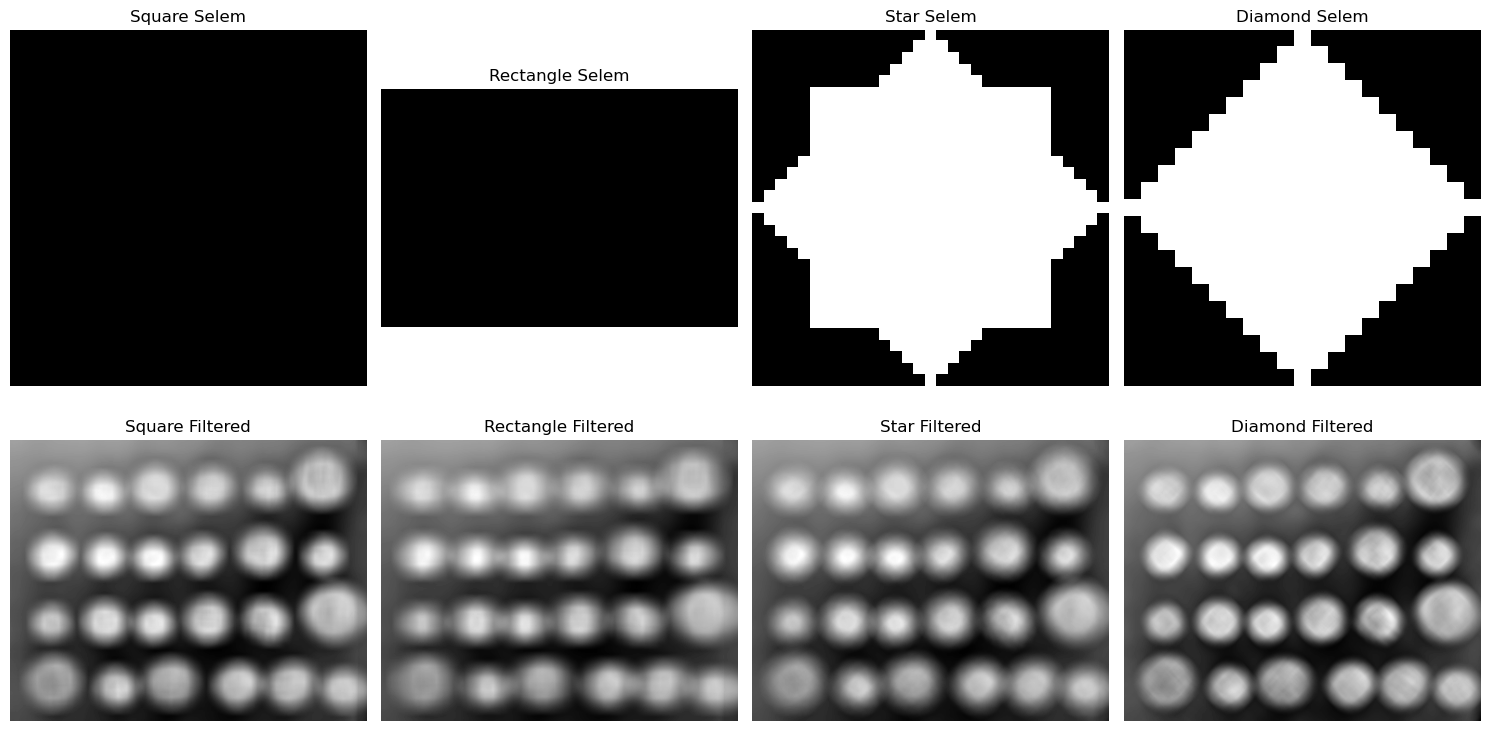

In [29]:
# solution
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_ubyte
from skimage.filters import rank
from skimage.morphology import square, rectangle, star, diamond

coins = data.coins()
coins_8bit = img_as_ubyte(coins)  
selems = {
    "Square": square(20),
    "Rectangle": rectangle(20, 30),
    "Star": star(10),
    "Diamond": diamond(10)
}

filtered_images = {name: rank.mean(coins_8bit, selem) for name, selem in selems.items()}

fig, axes = plt.subplots(2, len(selems), figsize=(15, 8))

for i, (name, selem) in enumerate(selems.items()):
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(f"{name} Selem")
    axes[0, i].axis("off")

for i, (name, img) in enumerate(filtered_images.items()):
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title(f"{name} Filtered")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...
Increasing the radius of the disk structuring element increases the smoothing effect, making the image blurrier. A larger radius averages pixel values over a bigger area, reducing noise but also losing fine details. A smaller radius preserves more details while applying mild smoothing.


*   What is the observed behaviour with difference in the structuring element?


**Solution**

*(Double-click or enter to edit)*

...
Square: Uniform smoothing, strong blurring.
Rectangle: Directional smoothing, more blur along its longer side.
Star: Preserves more details, less aggressive smoothing.
Diamond: Localized smoothing, keeps edges sharper than the square.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...